In [3]:
import numpy as np
import pandas as pd
import queue
import matplotlib.pyplot as plt

from Backtest.backtest import Backtest
from Backtest.data import OHLCDataHandler
from EMVStrategy import EMVStrategy
from Backtest.open_json_gz_files import open_json_gz_files
from Backtest.generate_bars import generate_bars

In [4]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
import hyperopt.pyll.stochastic

In [14]:
def run_backtest(config, trading_data, ohlc_data, window, n, m):
    window = int(window)
    n = int(n)
    m = int(m)
    if window == 0 or n == 0 or m == 0:
        return 1
    config['title'] = "EMVStrategy" + "_" + str(window) + "_" + str(n) + "_" + str(m)
    print("---------------------------------")
    print(config['title'])
    print("---------------------------------")
    
    events_queue = queue.Queue()

    data_handler = OHLCDataHandler(
        config, events_queue,
        trading_data = trading_data, ohlc_data = ohlc_data
    )
    strategy = EMVStrategy(config, events_queue, data_handler,
                           window=window, n=n, m=m)

    backtest = Backtest(config, events_queue, strategy,
                        data_handler= data_handler)

    results = backtest.start_trading()
    
    # dict_ans = {
    #     "window": [window],
    #     "n": [n],
    #     "m": [m],
    #     "Sharpe Ratio": [results['sharpe']],
    #     "Total Returns": [(results['cum_returns'][-1] - 1)],
    #     "Max Drawdown": [(results["max_drawdown"] * 100.0)],
    #     "Max Drawdown Duration": [(results['max_drawdown_duration'])],
    #     "Trades": [results['trade_info']['trading_num']],
    #     "Trade Winning": [results['trade_info']['win_pct']],
    #     "Average Trade": [results['trade_info']['avg_trd_pct']],
    #     "Average Win": [results['trade_info']['avg_win_pct']],
    #     "Average Loss": [results['trade_info']['avg_loss_pct']],
    #     "Best Trade": [results['trade_info']['max_win_pct']],
    #     "Worst Trade": [results['trade_info']['max_loss_pct']],
    #     "Worst Trade Date": [results['trade_info']['max_loss_dt']],
    #     "Avg Days in Trade": [results['trade_info']['avg_dit']]
    # }
    # return pd.DataFrame(dict_ans)
    return -1 * (results['cum_returns'][-1] - 1)

In [15]:
def f(params):
    config = {
        "csv_dir": "C:/backtest/Binance",
        "out_dir": "C:/backtest/results/EMVStrategy",
        "title": "EMVStrategy",
        "is_plot": False,
        "save_plot": False,
        "save_tradelog": False,
        "start_date": pd.Timestamp("2017-07-01T00:0:00", freq = "60" + "T"),    # str(freq) + "T"
        "end_date": pd.Timestamp("2018-04-01T00:00:00", freq = "60" + "T"),
        "equity": 1.0,
        "freq": 60,      # min
        "commission_ratio": 0.001,
        "suggested_quantity": None,     # None or a value
        "max_quantity": None,           # None or a value, Maximum purchase quantity
        "min_quantity": None,           # None or a value, Minimum purchase quantity
        "min_handheld_cash": None,      # None or a value, Minimum handheld funds
        "exchange": "Binance",
        "tickers": ['BTCUSDT']
    }
    # trading_data = {}
    # for ticker in config['tickers']:
    #     # trading_data[ticker] = open_gz_files(config['csv_dir'], ticker)
    #     trading_data[ticker] = pd.read_hdf(config['csv_dir'] + '\\' + ticker + '.h5', key=ticker)

    ohlc_data = {}
    for ticker in config['tickers']:
        # ohlc_data[ticker] = generate_bars(trading_data, ticker, config['freq'])
        ohlc_data[ticker] = pd.read_hdf(config['csv_dir'] + '\\' + ticker + '_OHLC_60min.h5', key=ticker)

    trading_data = None
    
    window = params['window']
    n = params['n']
    m = params['m']
    val = run_backtest(config, trading_data, ohlc_data, window, n, m)
    return {'loss': val, 'status': STATUS_OK}

In [16]:
space = {
    'window': hp.randint('window', 120),
    'n': hp.randint('n', 120),
    'm': hp.randint('m', 120)
}

In [17]:
# print(hyperopt.pyll.stochastic.sample(space))

In [18]:
trials = Trials()

In [19]:
best = fmin(fn=f, space=space, algo=tpe.suggest, max_evals=150, trials=trials)

---------------------------------
EMVStrategy_117_31_36
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 0.5536136322
Max Drawdown: 48.6915353831
Max Drawdown Duration: 2736
Total Returns: 0.1237417244
---------------------------------
Trades: 19
Trade Winning: 47%
Average Trade: 2.09%
Average Win: 15.20%
Average Loss: -9.71%
Best Trade: 34.32%
Worst Trade: -28.60%
Worst Trade Date: 1 days 11:00:00
Avg Days in Trade: 4 days 03:22:06
---------------------------------
---------------------------------
EMVStrategy_118_20_59
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------

---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 0.7358800417
Max Drawdown: 67.1333648457
Max Drawdown Duration: 2277
Total Returns: 0.2306675629
---------------------------------
Trades: 16
Trade Winning: 69%
Average Trade: 2.69%
Average Win: 11.17%
Average Loss: -15.99%
Best Trade: 31.66%
Worst Trade: -29.82%
Worst Trade Date: 3 days 04:00:00
Avg Days in Trade: 4 days 16:15:00
---------------------------------
---------------------------------
EMVStrategy_80_87_44
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 0.6570854640
Max Drawdown: 61.4300759975
Max Drawdown Duration: 2736
Total Returns: 0.1852841157
---------------------------------
Trades: 15
Trade Winning:

---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 1.1027820617
Max Drawdown: 35.5225757993
Max Drawdown Duration: 2736
Total Returns: 0.4836865405
---------------------------------
Trades: 29
Trade Winning: 55%
Average Trade: 1.98%
Average Win: 7.79%
Average Loss: -5.18%
Best Trade: 19.15%
Worst Trade: -18.22%
Worst Trade Date: 2 days 13:00:00
Avg Days in Trade: 2 days 13:47:35
---------------------------------
---------------------------------
EMVStrategy_66_54_41
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 0.8694511062
Max Drawdown: 62.0683997304
Max Drawdown Duration: 2277
Total Returns: 0.3202150813
---------------------------------
Trades: 18
Trade Winning: 5

---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: -0.2688003566
Max Drawdown: 62.0401638787
Max Drawdown Duration: 2736
Total Returns: -0.2565309741
---------------------------------
Trades: 14
Trade Winning: 36%
Average Trade: -0.53%
Average Win: 20.15%
Average Loss: -12.02%
Best Trade: 35.11%
Worst Trade: -21.59%
Worst Trade Date: 3 days 04:00:00
Avg Days in Trade: 5 days 18:21:26
---------------------------------
---------------------------------
EMVStrategy_33_48_109
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 1.4905970109
Max Drawdown: 52.4640487120
Max Drawdown Duration: 2018
Total Returns: 0.7987527335
---------------------------------
Trades: 19
Trade Winn

---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 0.6429641432
Max Drawdown: 51.2538750991
Max Drawdown Duration: 2736
Total Returns: 0.1772284411
---------------------------------
Trades: 18
Trade Winning: 61%
Average Trade: 2.12%
Average Win: 10.73%
Average Loss: -11.41%
Best Trade: 45.08%
Worst Trade: -17.92%
Worst Trade Date: 4 days 23:00:00
Avg Days in Trade: 4 days 07:46:40
---------------------------------
---------------------------------
EMVStrategy_27_69_79
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 1.4930887699
Max Drawdown: 46.0739853877
Max Drawdown Duration: 2018
Total Returns: 0.7594232791
---------------------------------
Trades: 22
Trade Winning:

---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 0.0281018237
Max Drawdown: 53.4658995864
Max Drawdown Duration: 2736
Total Returns: -0.1250609051
---------------------------------
Trades: 13
Trade Winning: 54%
Average Trade: 0.38%
Average Win: 13.42%
Average Loss: -14.82%
Best Trade: 29.68%
Worst Trade: -24.55%
Worst Trade Date: 3 days 01:00:00
Avg Days in Trade: 6 days 09:09:14
---------------------------------
---------------------------------
EMVStrategy_90_51_106
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 0.1203353347
Max Drawdown: 61.0189785621
Max Drawdown Duration: 2736
Total Returns: -0.1034914046
---------------------------------
Trades: 15
Trade Winni

---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 0.8359334741
Max Drawdown: 52.1427415550
Max Drawdown Duration: 2736
Total Returns: 0.3041883752
---------------------------------
Trades: 15
Trade Winning: 53%
Average Trade: 3.40%
Average Win: 15.79%
Average Loss: -10.77%
Best Trade: 46.00%
Worst Trade: -19.83%
Worst Trade Date: 3 days 11:00:00
Avg Days in Trade: 5 days 05:12:00
---------------------------------
---------------------------------
EMVStrategy_31_73_28
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 0.9256832167
Max Drawdown: 44.0367339154
Max Drawdown Duration: 1687
Total Returns: 0.3430215224
---------------------------------
Trades: 27
Trade Winning:

---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 0.5512007784
Max Drawdown: 58.9417888459
Max Drawdown Duration: 2510
Total Returns: 0.1212633701
---------------------------------
Trades: 45
Trade Winning: 42%
Average Trade: 0.86%
Average Win: 9.28%
Average Loss: -5.28%
Best Trade: 29.11%
Worst Trade: -18.35%
Worst Trade Date: 0 days 20:00:00
Avg Days in Trade: 1 days 17:46:40
---------------------------------
---------------------------------
EMVStrategy_20_74_87
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 1.3620723090
Max Drawdown: 51.7174361487
Max Drawdown Duration: 2018
Total Returns: 0.6870775800
---------------------------------
Trades: 21
Trade Winning: 5

---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 1.2439893042
Max Drawdown: 51.0382951347
Max Drawdown Duration: 2736
Total Returns: 0.6084349771
---------------------------------
Trades: 28
Trade Winning: 46%
Average Trade: 2.21%
Average Win: 9.93%
Average Loss: -4.48%
Best Trade: 20.00%
Worst Trade: -18.83%
Worst Trade Date: 2 days 15:00:00
Avg Days in Trade: 2 days 17:36:26
---------------------------------
---------------------------------
EMVStrategy_10_40_56
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 0.2410435065
Max Drawdown: 62.5753144575
Max Drawdown Duration: 2510
Total Returns: -0.0632298051
---------------------------------
Trades: 43
Trade Winning: 

Total Returns: 0.2127747260
---------------------------------
Trades: 17
Trade Winning: 65%
Average Trade: 2.12%
Average Win: 9.87%
Average Loss: -12.08%
Best Trade: 20.73%
Worst Trade: -25.94%
Worst Trade Date: 3 days 15:00:00
Avg Days in Trade: 4 days 12:35:18
---------------------------------
---------------------------------
EMVStrategy_77_86_32
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 0.6059736053
Max Drawdown: 63.8068125963
Max Drawdown Duration: 2736
Total Returns: 0.1535396034
---------------------------------
Trades: 15
Trade Winning: 53%
Average Trade: 1.92%
Average Win: 11.17%
Average Loss: -8.65%
Best Trade: 25.85%
Worst Trade: -19.41%
Worst Trade Date: 3 days 15:00:00
Avg Days in Trade: 5 days 02:1

---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 0.4436347947
Max Drawdown: 65.1977622212
Max Drawdown Duration: 2277
Total Returns: 0.0527480843
---------------------------------
Trades: 15
Trade Winning: 67%
Average Trade: 1.32%
Average Win: 8.55%
Average Loss: -13.15%
Best Trade: 23.24%
Worst Trade: -22.19%
Worst Trade Date: 4 days 02:00:00
Avg Days in Trade: 5 days 03:00:00
---------------------------------
---------------------------------
EMVStrategy_86_38_20
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 0.6722256203
Max Drawdown: 63.9257196327
Max Drawdown Duration: 2277
Total Returns: 0.1882602843
---------------------------------
Trades: 20
Trade Winning: 

---------------------------------
EMVStrategy_45_43_91
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 1.1090880970
Max Drawdown: 63.2909363138
Max Drawdown Duration: 2018
Total Returns: 0.4864390674
---------------------------------
Trades: 19
Trade Winning: 58%
Average Trade: 2.89%
Average Win: 10.34%
Average Loss: -7.37%
Best Trade: 19.75%
Worst Trade: -12.40%
Worst Trade Date: 3 days 18:00:00
Avg Days in Trade: 3 days 22:28:25
---------------------------------
---------------------------------
EMVStrategy_8_2_27
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
-------------------

---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 1.5316418758
Max Drawdown: 49.9662985133
Max Drawdown Duration: 1687
Total Returns: 0.8074875934
---------------------------------
Trades: 30
Trade Winning: 60%
Average Trade: 2.68%
Average Win: 9.02%
Average Loss: -6.83%
Best Trade: 24.61%
Worst Trade: -25.31%
Worst Trade Date: 3 days 10:00:00
Avg Days in Trade: 2 days 12:18:00
---------------------------------
---------------------------------
EMVStrategy_36_47_18
---------------------------------
Data Time Interval for BTCUSDT:
	Start Date	: 2017-10-27 22:00:00
	End Date	: 2018-04-01 00:00:00
---------------------------------
Running Backtest...
---------------------------------
---------------------------------
Backtest complete.
---------------------------------
Sharpe Ratio: 0.7842156229
Max Drawdown: 45.1533379469
Max Drawdown Duration: 2277
Total Returns: 0.2676242733
---------------------------------
Trades: 31
Trade Winning: 4

In [22]:
best

{'m': 9, 'n': 14, 'window': 65}

In [23]:
for trial in trials.trials:
    print(trial['misc']['vals'], "\t",trial['result']['loss'])

{'m': [36], 'n': [31], 'window': [117]} 	 -0.12374172436752318
{'m': [59], 'n': [20], 'window': [118]} 	 -0.08394524921096913
{'m': [16], 'n': [98], 'window': [31]} 	 -1.3606313505224303
{'m': [53], 'n': [61], 'window': [78]} 	 -0.09941723559450422
{'m': [26], 'n': [41], 'window': [111]} 	 -0.13094457594854703
{'m': [18], 'n': [44], 'window': [8]} 	 -0.009365458835277618
{'m': [84], 'n': [15], 'window': [0]} 	 1.0
{'m': [75], 'n': [104], 'window': [80]} 	 0.07623829178016672
{'m': [16], 'n': [68], 'window': [70]} 	 -0.7112764150665396
{'m': [64], 'n': [98], 'window': [54]} 	 -0.016245170395169817
{'m': [77], 'n': [5], 'window': [117]} 	 -0.07476262577008241
{'m': [96], 'n': [71], 'window': [102]} 	 0.23628721049806756
{'m': [116], 'n': [19], 'window': [64]} 	 -0.23066756286370604
{'m': [44], 'n': [87], 'window': [80]} 	 -0.1852841157132692
{'m': [81], 'n': [39], 'window': [31]} 	 -0.5325981035575666
{'m': [50], 'n': [56], 'window': [92]} 	 -0.13973600187377855
{'m': [8], 'n': [117], 'w

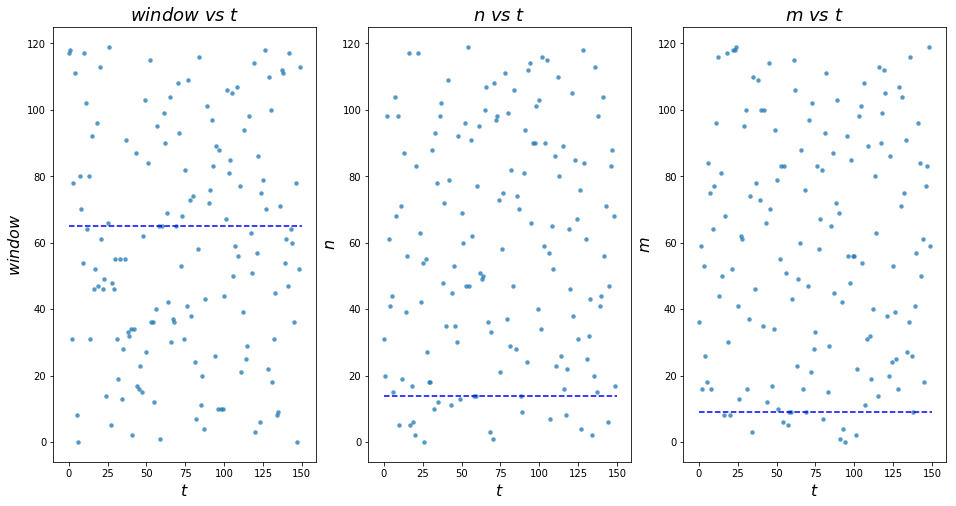

In [25]:
f, ax = plt.subplots(1,3, figsize = (16, 8))
xs = [t['tid'] for t in trials.trials]
ys = [t['misc']['vals']['window'] for t in trials.trials]
ax[0].set_xlim(xs[0]-10, xs[-1]+10)
ax[0].scatter(xs, ys, s=20, linewidth=0.01, alpha=0.75)
ax[0].set_title('$window$ $vs$ $t$ ', fontsize=18)
ax[0].set_xlabel('$t$', fontsize=16)
ax[0].set_ylabel('$window$', fontsize=16)
ax[0].hlines(best['window'], 0, 150,color='blue',linestyle="--")

xs = [t['tid'] for t in trials.trials]
ys = [t['misc']['vals']['n'] for t in trials.trials]
ax[1].set_xlim(xs[0]-10, xs[-1]+10)
ax[1].scatter(xs, ys, s=20, linewidth=0.01, alpha=0.75)
ax[1].set_title('$n$ $vs$ $t$ ', fontsize=18)
ax[1].set_xlabel('$t$', fontsize=16)
ax[1].set_ylabel('$n$', fontsize=16)
ax[1].hlines(best['n'], 0, 150,color='blue',linestyle="--")

xs = [t['tid'] for t in trials.trials]
ys = [t['misc']['vals']['m'] for t in trials.trials]
ax[2].set_xlim(xs[0]-10, xs[-1]+10)
ax[2].scatter(xs, ys, s=20, linewidth=0.01, alpha=0.75)
ax[2].set_title('$m$ $vs$ $t$ ', fontsize=18)
ax[2].set_xlabel('$t$', fontsize=16)
ax[2].set_ylabel('$m$', fontsize=16)
ax[2].hlines(best['m'], 0, 150,color='blue',linestyle="--")

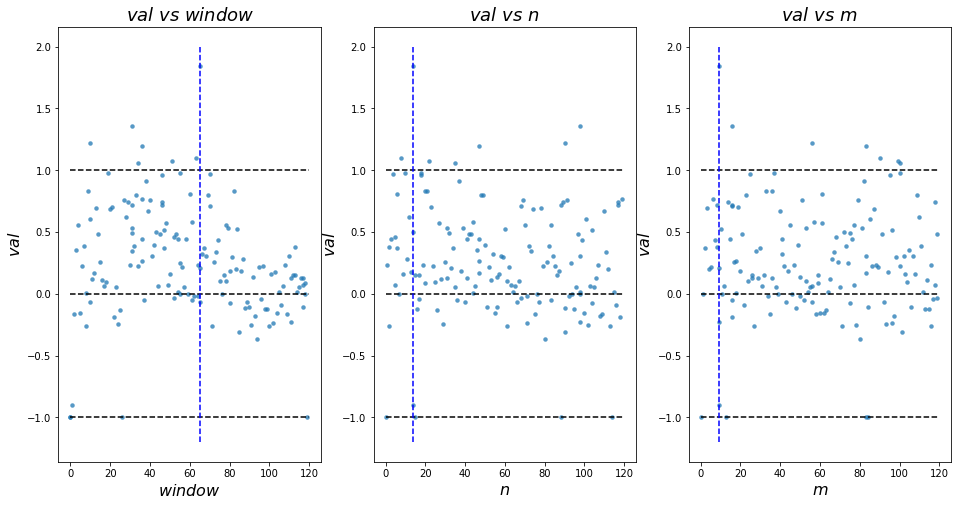

In [27]:
f, ax = plt.subplots(1,3, figsize = (16, 8))
xs = [t['misc']['vals']['window'] for t in trials.trials]
ys = [-1 * t['result']['loss'] for t in trials.trials]
ax[0].scatter(xs, ys, s=20, linewidth=0.01, alpha=0.75)
ax[0].set_title('$val$ $vs$ $window$ ', fontsize=18)
ax[0].set_xlabel('$window$', fontsize=16)
ax[0].set_ylabel('$val$', fontsize=16)
ax[0].hlines(0, 0, 120, color='black',linestyle="--")
ax[0].hlines(-1, 0, 120, color='black',linestyle="--")
ax[0].hlines(1, 0, 120, color='black',linestyle="--")
ax[0].vlines(best['window'], -1.2, 2, color='blue',linestyle="--")

xs = [t['misc']['vals']['n'] for t in trials.trials]
ys = [-1 * t['result']['loss'] for t in trials.trials]
ax[1].scatter(xs, ys, s=20, linewidth=0.01, alpha=0.75)
ax[1].set_title('$val$ $vs$ $n$ ', fontsize=18)
ax[1].set_xlabel('$n$', fontsize=16)
ax[1].set_ylabel('$val$', fontsize=16)
ax[1].hlines(0, 0, 120,color='black',linestyle="--")
ax[1].hlines(-1, 0, 120, color='black',linestyle="--")
ax[1].hlines(1, 0, 120,color='black',linestyle="--")
ax[1].vlines(best['n'], -1.2, 2, color='blue',linestyle="--")

xs = [t['misc']['vals']['m'] for t in trials.trials]
ys = [-1 * t['result']['loss'] for t in trials.trials]
ax[2].scatter(xs, ys, s=20, linewidth=0.01, alpha=0.75)
ax[2].set_title('$val$ $vs$ $m$ ', fontsize=18)
ax[2].set_xlabel('$m$', fontsize=16)
ax[2].set_ylabel('$val$', fontsize=16)
ax[2].hlines(0, 0, 120,color='black',linestyle="--")
ax[2].hlines(-1, 0, 120, color='black',linestyle="--")
ax[2].hlines(1, 0, 120,color='black',linestyle="--")
ax[2].vlines(best['m'], -1.2, 2, color='blue',linestyle="--")